{[Click aquí para ver este documento en Google Colab](https://colab.research.google.com/drive/1YCfV_KdJUjegdRnSF4PJU7fMFXkhLWon)}

<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header" width = 100%><tr>
    <th align = "left">HackerRank, 2020/10/13</th>
    <th align = "right">Por: Gaston Solari Loudet</th>
</tr></table>

### <u>**Imports y ajustes prévios**</u>

In [ ]:
import sys, matplotlib.pyplot
from math import exp, log10 as log
from urllib.request import urlretrieve
URL = "https://drive.google.com/uc?id="
ID = "1qnqKr0jzE-qhqcW43ygq7WWwphOLRA5x"
urlretrieve(URL + ID, "algoCompare.py");
from algoCompare import algoCompare

### [The Coin Change Problem](https://www.hackerrank.com/challenges/coin-change/problem)

Cantidad de formas en las que puedo armar un número "$a$" ("``amount``") sumando combinaciones de números dentro de un vector "$\bar{c}$" ("``coins``").

#### **<u>Forma 1</u>: sin recursiones**

In [ ]:
def getWays1(amount, coins):
    combs = [1] + [0]*amount
    for coin in coins:
        for n in range(amount + 1):
            if (n - coin >= 0):
                plus = combs[n - coin]
                combs[n] = combs[n] + plus
    return combs[-1]

getWays1(12, [1, 2, 5])

13

#### **<u>Forma 2</u>: con recursiones**

In [ ]:
def getWays2(amount, coins, index):
    if (amount == 0): return 1
    if (amount < 0): return 0
    if (amount > 0) and (index == len(coins)): return 0
    return (getWays2(amount - coins[index], coins, index)
          + getWays2(amount, coins, index + 1))
    
getWays2(12, [1, 2, 5], 0)

13

#### **<u>Comparación</u>**

Iteration: 200 | Next (Log): 3.52 seg

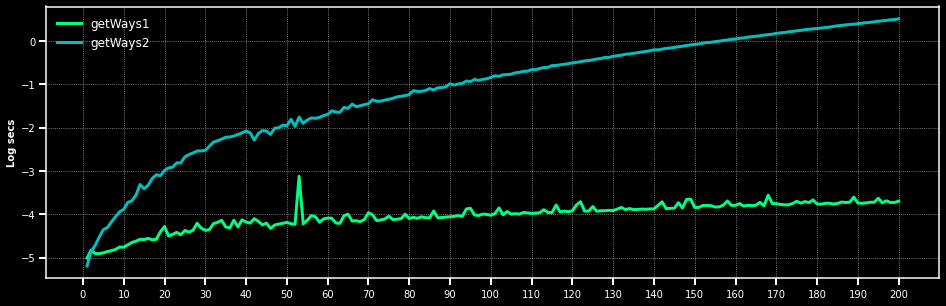

In [ ]:
coins = [1, 2, 5, 10, 20, 50, 100]
methods = {"getWays1": lambda n: getWays1(n, coins),
           "getWays2": lambda n: getWays2(n, coins, 0)}

Figure, Axes = algoCompare(methods, span = 2*max(coins), logt = True)

### [Stock Maximize](https://www.hackerrank.com/challenges/stockmax/problem)

Máxima suma de "deltas" acumulados que obtengo al restar los picos por los mas bajos anteriores, dentro de un vector "$X$".

In [ ]:
def stocksmax2(X):
    X_max = max(X)
    index = numpy.arange(len(X))
    t_max = int(index[X == X_max])
    stocks = X[: t_max]
    trades = sum(stocks)
    total = len(stocks)*X_max - trades
    if len(X[t_max + 1 :]) > 0:
        profit = stocksmax2(X[t_max + 1 :])
        total = total + profit
    return total

#### **<u>Comparación</u>**

Iteration: 1000 | Next (Log): 0.00 seg

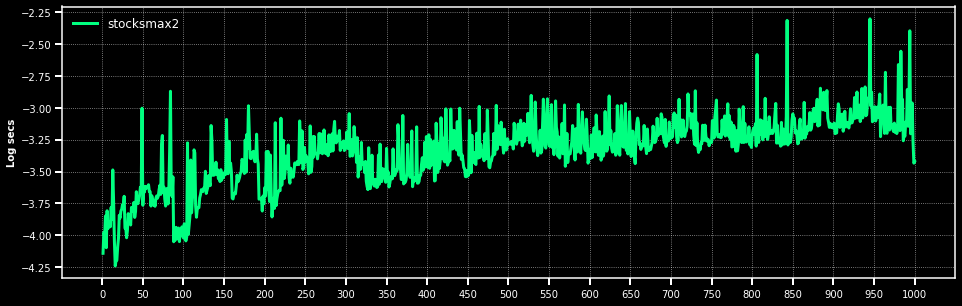

In [ ]:
import numpy
X = 100 + 0.001*numpy.random.randn(1000).cumsum()
methods = {"stocksmax2": lambda n: stocksmax2(X[: n + 1])}
Figure, Axes = algoCompare(methods, span = len(X), logt = True)

### [Max Array Sum](https://www.hackerrank.com/challenges/max-array-sum/problem)

Máxima suma de sub-arrays hecho de elementos que dentro del array original, no sean vecinos.

#### **<u>Forma 1</u>: sin recursiones**

In [ ]:
def maxSubsetSum1(arr):
    inc, exc = arr[0], 0
    for i in range(1, len(arr)):
        new = max(inc, exc)
        inc = exc + arr[i]
        exc = new
    return max(inc, exc)

#### **<u>Forma 2</u>: con recursiones**

In [ ]:
def maxSubsetSum2(arr):
    if (len(arr) == 0): return 0
    if (len(arr) == 1): return arr[0]
    if (len(arr) == 2): return max(arr)
    Max = None
    for i in range(len(arr)):
        Sum, ar0 = arr[i], arr[i + 2:]
        if Max == None: Max = Sum
        Sum += maxSubsetSum2(ar0)
        Max = max(Sum, Max)
    return Max

#### **<u>Comparación</u>**

Iteration: 36 | Next (Log): 35.51 seg

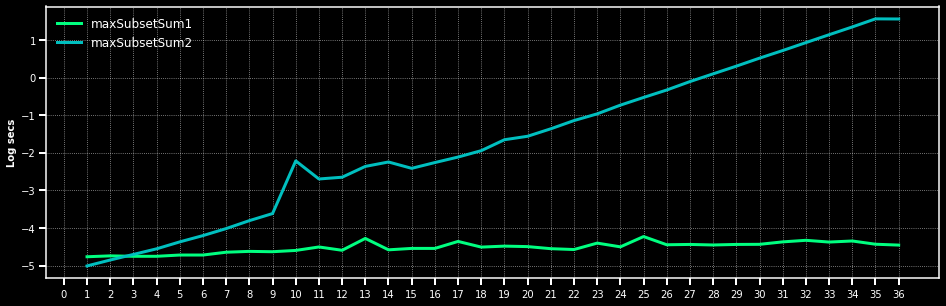

In [ ]:
N = 36
X = numpy.random.randint(low = -N//4, high = N//4, size = N)
methods = {"maxSubsetSum1": lambda n: maxSubsetSum1(X[: n + 1]),
           "maxSubsetSum2": lambda n: maxSubsetSum2(X[: n + 1])}
Figure, Axes = algoCompare(methods, span = N, logt = True)

### [Modified Fibonacci](https://www.hackerrank.com/challenges/fibonacci-modified/problem)

Ecuación recursiva no lineal de orden 2.

<u><b>Forma 1: sin recursiones</b></u>

In [ ]:
def fiboModified1(t1, t2, n):
    x1, x2 = t2, t1
    for i in range(2, n + 1):
        x1, x2 = x1**2 + x2, x1
    return x1

<u><b>Forma 2: con recursiones</b></u>

In [ ]:
def fiboModified2(t1, t2, n):
    if (n == 0): return t2
    if (n == 1): return t1
    x1 = fiboModified2(t1, t2, n - 1)
    x2 = fiboModified2(t1, t2, n - 2)
    return (x1**2 + x2)

<b><u>Forma 3: con memorización</u></b>

In [ ]:
fiboModified3_memo = dict()
def fiboModified3(t1, t2, n):
    if (n < 2): return [t2, t1][n]
    if n not in fiboModified3_memo:
        x1 = fiboModified3(t1, t2, n - 1)
        x2 = fiboModified3(t1, t2, n - 2)
        fiboModified3_memo[n] = x1**2 + x2
    return fiboModified3_memo[n]

**<u>Comparación</u>**

Iteration: 30 | Next (Log): 1894.63 seg

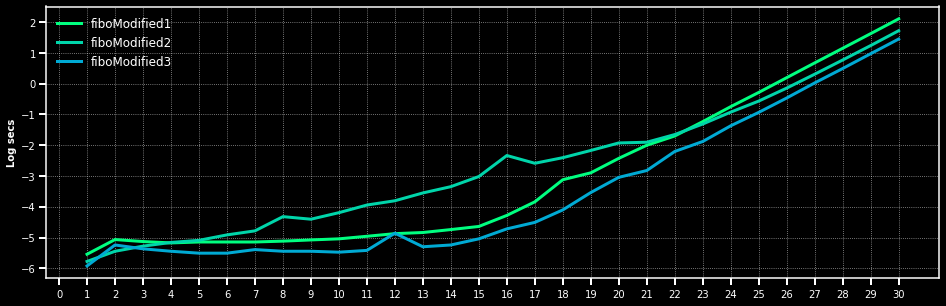

In [ ]:
fiboModified3_memo = dict()
methods = {"fiboModified1": lambda n: fiboModified1(0, 1, n),
           "fiboModified2": lambda n: fiboModified2(0, 1, n),
           "fiboModified3": lambda n: fiboModified3(0, 1, n)}
Figure, Axes = algoCompare(methods, span = 30, logt = True)